In [1]:
%load_ext tikzmagic
%matplotlib inline

# 베르누이분포와 이항분포

## 베르누이분포

<b>베르누이분포(bernoulli distribution)</b>는 값이 두가지로만 나오는 범주값 확률변수의 확률분포다. 예를 들어 동전을 한 번 던졌을 때 앞면 혹은 뒷면이 나오는 것은 베르누이분포를 따르는 확률변수다. 또한 앞 절에서 설명한 팁 데이터에서 성별을 나타내는 sex 필드나 흡연유무를 나타내는 smoker 필드, 그리고 점심/저녁을 나타내는 time 필드는 모두 베르누이분포를 따른다고 할 수 있다. 베르누이분포의 값은 성별일 경우 "Male/Female", 흡연유무를 나타내는 경우 "Yes/No"같이 문자열이 되는 경우가 많지만 수학적 모형을 위해 이 값을 0과 1이라는 숫자로 바꾸어서 사용하는 경우가 보통이다. 어느 값을 0으로 하고 어느 값을 1로 할지는 분석하는 사람의 마음대로다.

### 베르누이분포의 확률분포함수

확률변수 $x$가 베르누이분포를 따르는 경우 다음과 같이 표시한다.

$$ x \sim \text{Bern}(x) $$

위 식에서 $\text{Bern}(x)$은 베르누이분포의 확률질량함수를 가리키는 기호다. 

베르누이분포의 확률질량함수 $\text{Bern}(x)$의 수식은 다음과 같다.

$$
\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}
$$

이 식에서 $x$의 값이 1이 될 확률을 $\mu$라는 기호로 표시한다. $x$의 값이 0이 될 확률은 $1-\mu$가 된다. 위 식에서 베르누이분포의 모수는 $\mu$ 하나만 있다는 것을 알 수 있다. 모수는 위 식에서 표시하였듯이 확류변수의 값 기호 $x$ 오른쪽에 세미콜론(;) 기호를 붙이고 그 옆에 표시한다. 만약 1과 0이 나올 확률이 같다면 $\mu=0.5$가 되므로 다음과 같이 쓸 수 있다. 

$$
\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
0.5   & \text{if }x=1, \\
0.5 & \text{if }x=0
\end{cases}
\end{align}
\end{split}
$$

확률질량함수 $\text{Bern}(x)$을 다음과 같이 쓰기도 한다. $x$의 값에 0과 1을 각각 대입해보면 이 식과 위에서 쓴 식은 같은 식이라는 것을 알 수 있을 것이다.

$$ \text{Bern}(x;\mu) = \mu^x(1-\mu)^{(1-x)} $$

만약 1과 0이 나올 확률이 같다면 다음과 같이 쓸 수 있다. 

$$ \text{Bern}(x;\mu) = 0.5^x0.5^{(1-x)} $$



### 베르누이 분포의 시뮬레이션

scipy 패키지의 stats 서브패키지는 베르누이분포를 시뮬레이션할 수 있는 `bernoulli` 클래스를 제공한다. 우선 다음과 같이 모수를 지정한 클래스 인스턴스를 만든다.

In [2]:
from scipy.stats import bernoulli

mu = 0.5
x = bernoulli(p=mu)
x

`pmf` 메서드를 사용하면 확률질량함수를 계산할 수 있다. 인수로는 확률변수가 가질 수 있는 값 즉, 0과 1을 넣는다.

In [3]:
x.pmf([0, 1])

array([0.5, 0.5])

`rvs` 메서드를 사용하면 시뮬레이션을 통해 표본을 측정할 수 있다. 인수로는 시뮬레이션 즉, 표본 개수를 넣는다. `np.random.seed` 명령은 시뮬레이션의 시드값을 설정하기 위한 것이다. 시드값이 같으면 시뮬레이션 값은 항상 동일한 값이 나온다.

In [4]:
import numpy as np

np.random.seed(0)

samples = x.rvs(10)
samples

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

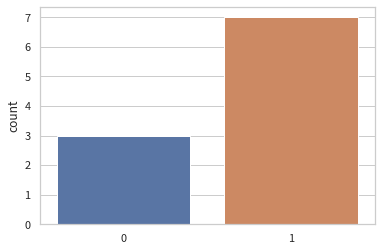

In [5]:
import seaborn as sns
import matplotlib.pylab as plt

sns.countplot(samples);
plt.show()

### 베르누이분포의 예

위에서 이야기한대로 팁 데이터에서 성별을 나타내는 sex 데이터는 남성 또는 여성의 두 가지 값만 가지므로 베르누이분포를 따르는 확률변수다. 따라서 다음과 같이 표현할 수 있다. 

$$ \text{sex} \sim \text{Bern}(\text{sex};\mu_{\text{sex}}) $$

sex 데이터의 확률분포는 다음과 같이 시각화할 수 있다.

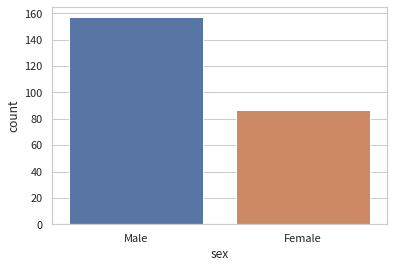

In [6]:
tips = sns.load_dataset("tips")

sns.countplot(x="sex", data=tips)
plt.show()

### 베르누이분포의 모수추정

베르누이분포는 확률분포함수가 고정된 수식으로 표현된 확률분포모형이므로 모수값 $\mu$만 알 수 있다면 확률분포함수를 완전히 알아내는 것이다. 그러면 베르누이분포의 모수는 다음 수식으로 추정한다. 이 식은 이후에 설명할 최대가능도추정(maximum likelihood estimation)방법을 따른 결과이다. 자세한 이론은 이후에 다루도록 한다.

$$ \hat{\mu} = \dfrac{N_1}{N_1 + N_0} $$

이 식에서 수학기호 $\hat{\mu}$는 모수 $\mu$의 추정치를 말한다. $N_0$는 데이터 값이 0인 횟수, $N_1$은 데이터 값이 1인 횟수다. 즉, 전체 데이터 중 1이 나온 횟수의 비율이 모수 $\mu$의 추정치 $\hat{\mu}$가 된다. 


실제로 sex 데이터의 모수를 추정해보자. 여기에서는 남자(Male)인 경우를 $x=1$인 경우라고 가정한다. 다음 코드로 $N_1=157, N_0=87$이라는 것을 알 수 있다.

In [7]:
vc = (tips["sex"] == "Male").value_counts()
N1, N0 = vc[True], vc[False]
N1, N0

(157, 87)

따라서 모수의 추정치는 약 0.6434426229508197가 된다.

In [8]:
mu_hat = N1 / (N1 + N0)
mu_hat

0.6434426229508197

### 모수추정에 관한 추가적인 사항

이렇게 모수를 추정하였지만 아직 다음과 같은 몇가지 의문점이 남아있다. 

1. 이 모수 추정치는 정말 정확한 값인가? 
1. 만약 이 모수 추정치가 정확한 값이 아니라면 어느 정도의 신뢰도를 가지는 것인가?
1. 원래 정확한 모수는 0인데 표본 오차에 의해 0.64344..이라는 값이 나온 것은 아닐까>
1. 이 모수 추정치를 0.64344..가 아니라 그냥 0.6이라고 해도 되는걸까?
1. 만약 모수에 대해 추가적인 정보가 있다면 어떻게 이를 추정치에 반영할 수 있을까?

첫번째 질문에 대한 답은 당연히 "아니다(No)"이다. 예를 들어 우리가 측정한 데이터의 개수가 달라지면 이 모수 추정치는 달라진다. 만약 데이터가 10개밖에 없다면 모수의 추정치는 다음과 같이 0.8이 된다.

In [9]:
vc = (tips["sex"][:10] == "Male").value_counts()
N1, N0 = vc[True], vc[False]
N1 / (N1 + N0)

0.8

우리가 추정에 사용한 표본에 따라 추정치가 변하는 것을 알 수 있다. 따라서 위에서 구한 추정치는 정확한 값이라고 할 수 없다. 그렇다면 이렇게 부정확한 모수 추청치의 신뢰도는 어떻게 구할 것인가? 이 부분에 대해서는 아래에서 설명할 모수 추정치의 <b>신뢰구간(confidence interval)</b>이라는 것을 사용하여 구할 수 있다. 

다음으로 이 모수 추정치가 정확한 모수의 값이 아니라면 원래 정확한 모수는 전혀 다른 값, 예를 들어 0이나 0.6일 수도 있다. 그런데 표본을 측정하다보니 어쩌다 0.6434426229508197라는 값이 나온 것일 수도 있다. 그렇다면 원래의 정확한 모수의 값이 0인데 이렇게 어쩌다 0이 아닌 값이 나왔을 가능성은 어느 정도일까? 이 문제는 <b>모수 검정(parameter testing)</b>과 관련된 내용으로 나중에 이 부분에 대해 자세히 설명할 것이다. 

마지막으로 만약 극단적으로 데이터를 다음과 같이 1번부터 3번까지 3개만 얻는다면 모두 남성(Male)이라는 결과가 나온다.

In [10]:
tips["sex"][1:4]

1    Male
2    Male
3    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

그러면 모수의 추정치는 1이 된다. 만약 정말 베르누이분포의 모수값이 1이라면 이후에 측정할 모든 표본값은 언제나 1이 나와야 한다는 뜻이다. 하지만 우리의 상식으로는 그럴 가능성이 극히 적다는 것을 안다. 이 추정치는 표본을 3개밖에 쓰지 않았기 때문에 얻어진 극단적으로 부정확한 값이며 실제 값은 1보다 작을 것이라는 것이 우리의 상식에 맞는 결과다. 즉, 우리의 상식이라는 추가적인 정보를 이 추정치에 반영할 수 있는 방법이 필요하다. 이는 이후의 절에서 설명할 <b>베이즈 추정(Bayesian estimation)</b> 방법을 사용하면 된다. 

## 이항분포

베르누이분포를 따르는 모수 $\mu$인 확률변수에서 $N$개의 표본을 얻었을 때 그 중 1인 값이 나오는 횟수의 분포를 <b>이항분포(binomial distribution)</b>라고 한다. 
어떤 확률변수 $x$가 이항분포를 따를 때 다음과 같이 표시한다.

$$ x \sim \text{Bin}(x) $$

동전을 한 번 던질 때 나오는 값은 베르누이분포를 따르므로 동전을 $N$번 던져서 앞면이 나오는 횟수는 이항분포가 된다.

위에서 설명한 scipy의 확률변수 시뮬레이션 기능을 통해 $N=10, \mu=0.5$인 이항분포의 표본 5개를 구해보자.

In [11]:
mu = 0.5
x = bernoulli(p=mu)

binomial_samples = []
for i in range(5):
    print(f"{i + 1}회 이항시도:")
    bernouilli_samples = x.rvs(10)
    binomial_sample = bernouilli_samples.sum()
    binomial_samples.append(binomial_sample)
    print("10회를 시행한 베르누이 샘플 =", bernouilli_samples)
    print("베르누이 샘플 10개 중 1이 나온 횟수 =", binomial_sample)
    print("-" * 80)

print("결론:")    
print("이항분포 표본 =", binomial_samples)

1회 이항시도:
10회를 시행한 베르누이 샘플 = [1 1 1 1 0 0 0 1 1 1]
베르누이 샘플 10개 중 1이 나온 횟수 = 7
--------------------------------------------------------------------------------
2회 이항시도:
10회를 시행한 베르누이 샘플 = [1 1 0 1 0 1 0 1 1 0]
베르누이 샘플 10개 중 1이 나온 횟수 = 6
--------------------------------------------------------------------------------
3회 이항시도:
10회를 시행한 베르누이 샘플 = [0 1 0 1 0 1 1 1 1 1]
베르누이 샘플 10개 중 1이 나온 횟수 = 7
--------------------------------------------------------------------------------
4회 이항시도:
10회를 시행한 베르누이 샘플 = [0 0 1 0 1 1 0 0 0 0]
베르누이 샘플 10개 중 1이 나온 횟수 = 3
--------------------------------------------------------------------------------
5회 이항시도:
10회를 시행한 베르누이 샘플 = [1 0 1 0 0 0 1 0 0 0]
베르누이 샘플 10개 중 1이 나온 횟수 = 3
--------------------------------------------------------------------------------
결론:
이항분포 표본 = [7, 6, 7, 3, 3]


여기에서는 표본을 5개만 측정하였지만 아주 많은 수의 측정을 반복한다면 어떨까? 아주 재수가 없다면 앞면이 단 한번도 나올 수 없을 것이고 아주 재수가 좋다면 10번 모두 앞면이 나올 수도 있을 것이다. 하지만 가장 확률이 높은 경우는 10번의 절반인 5번 나오는 경우일 것이다. 즉, 시행횟수가 $N$인 이항분포의 표본값은 0부터 $N$까지의 값을 가질 수 있다. 

### 이항분포의 확률분포함수

이항분포는 시행횟수 $N$과 베르누이모수 $\mu$ 이렇게 두 개의 모수를 가진다. 시행횟수가 $N$이고 베르누이모수가 $\mu$인 이항분포의 확률분포함수 수식은 다음과 같이 구할 수 있다. 

$$
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
$$

이 식에서 (𝑁𝑥) 기호는 <b>조합(combination)</b>이라는 기호로 $N$개 원소 중에 $x$개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다. 조합은 다음 공식으로 계산할 수 있다.

$$
\binom N x =\dfrac{N!}{x!(N-x)!}
$$

$!$ 기호는 <b>팩토리얼(factorial)</b>이라고 하며 다음처럼 정의한다.

$$
N! = N\cdot (N-1) \cdots 2 \cdot 1
$$

### 이항분포의 시뮬레이션

scipy 패키지의 stats 서브패키지는 이항분포를 시뮬레이션할 수 있는 `binom` 클래스를 제공한다. 사용방법은 앞에서 설명한 베르누이분포 시뮬레이션 클래스와 같다. 우선 시행횟수 

In [12]:
from scipy.stats import binom

N = 10
mu = 0.5
x = binom(n=N, p=mu)
x

`pmf` 메서드를 사용하면 확률질량함수를 계산할 수 있다. 인수로는 확률변수가 가질 수 있는 값 즉, 0부터 $N$까지의 정수값을 넣는다.

In [13]:
xx = np.arange(11)
p = x.pmf(xx)
p

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

이 값을 그려보면 위에서 그린 것과 같은 모양이 된다.

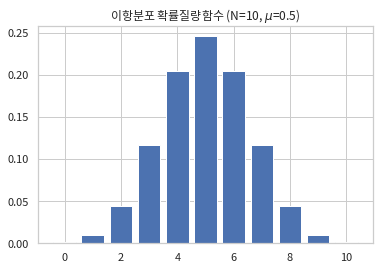

In [14]:
plt.bar(xx, p)
plt.title("이항분포 확률질량함수 (N=10, $\mu$=0.5)")
plt.show()

`rvs` 메서드를 사용하면 시뮬레이션을 통해 표본을 측정할 수 있다.

In [15]:
s = x.rvs(100)
s

array([3, 3, 6, 3, 4, 4, 6, 3, 7, 3, 8, 5, 8, 5, 6, 2, 4, 3, 4, 3, 4, 5,
       3, 6, 5, 4, 5, 3, 5, 7, 4, 6, 3, 6, 4, 4, 5, 2, 7, 1, 6, 4, 6, 8,
       4, 5, 5, 5, 4, 8, 5, 7, 6, 4, 6, 5, 7, 5, 7, 6, 6, 5, 8, 6, 5, 5,
       2, 4, 6, 4, 5, 5, 3, 4, 5, 5, 5, 6, 6, 5, 7, 4, 5, 7, 6, 6, 3, 7,
       6, 9, 3, 7, 3, 5, 3, 7, 6, 5, 5, 3])

numpy 패키지의 `bincount` 함수를 사용하면 이항함수 표본에서 각 값이 나온 횟수를 카운트할 수 있다. 

In [16]:
np.bincount(s, minlength=N + 1)

array([ 0,  1,  3, 16, 17, 26, 20, 11,  5,  1,  0])

이론적인 확률질량함수와 시뮬레이션 결과를 비교하면 다음 그림과 같다.

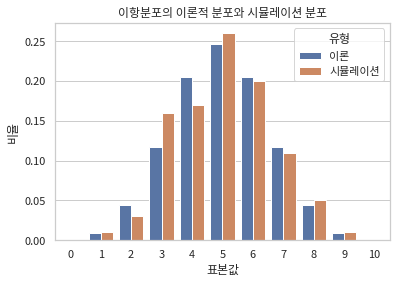

In [17]:
import pandas as pd

y = np.bincount(s, minlength=N + 1) / float(len(s))
df = pd.DataFrame({"이론": p, "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()